# Introduction 
In this file we look into the training behaviour of the dataset provided by franco. This dataset should not be extremely challenging as there are a limited amount of different messages, which makes it easier to provide a good reduction. 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import json 
import h5py

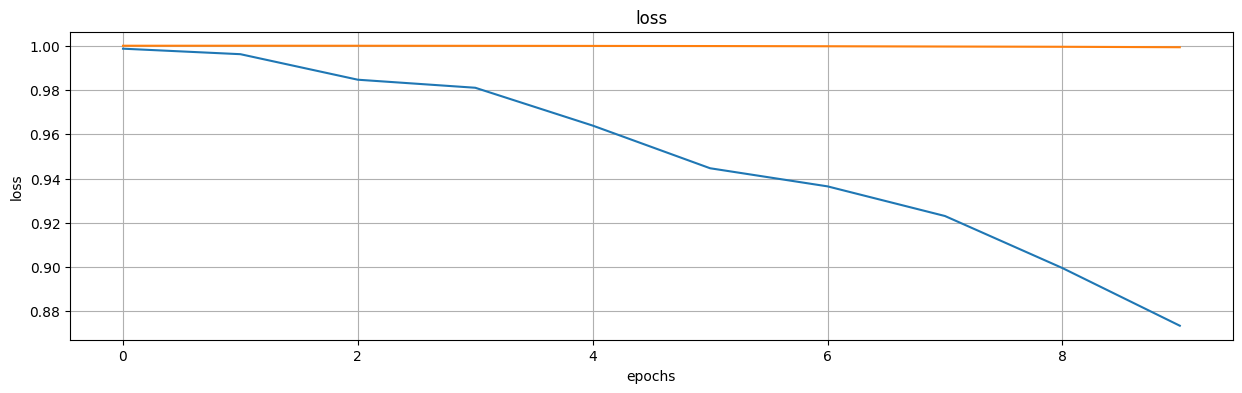

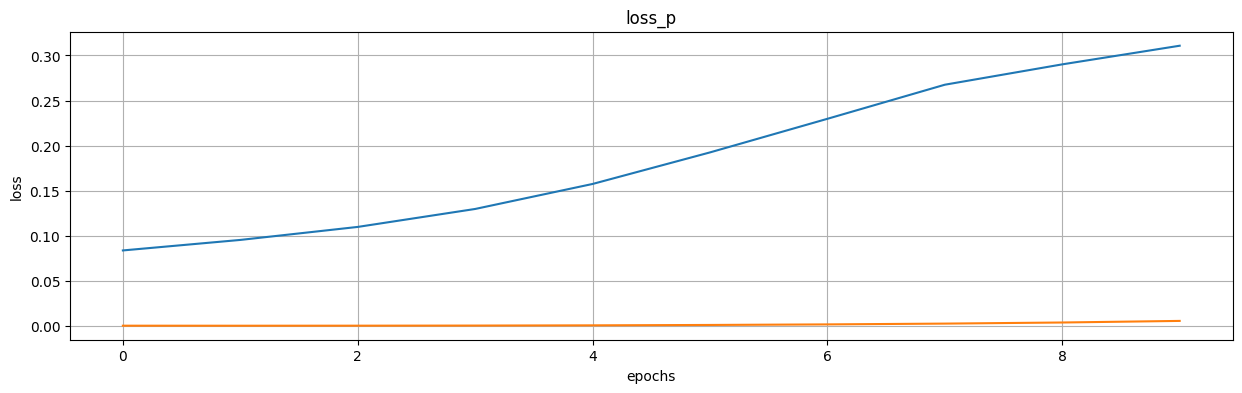

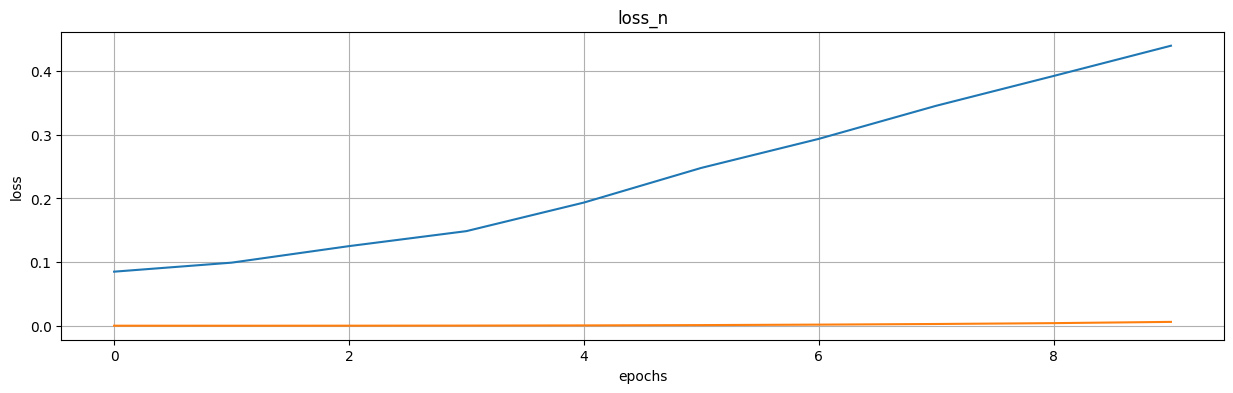

In [61]:
with open("../Results/Simpletest_lower/Training/training_history.json", "r") as f:
    h = json.load(f)

keys = ['loss','loss_p','loss_n']

for k in keys:
    plt.figure(figsize=(15, 4))
    plt.plot(h[k],label='train')
    plt.plot(h['val_'+k],label='val')
    plt.title(k)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.grid(True)
    plt.show()

# Extract threshold
We know the loss of the good samles, we know the loss of the negative samples. lets plot them togheter.
It might be better to create another dataset with unique messages. --> it is working to good now. 

In [62]:
data = np.load('../Results/Simpletest_lower/Training/threshold.npy',allow_pickle=True).item()

FileNotFoundError: [Errno 2] No such file or directory: '../Results/Simpletest_lower/Training/threshold.npy'

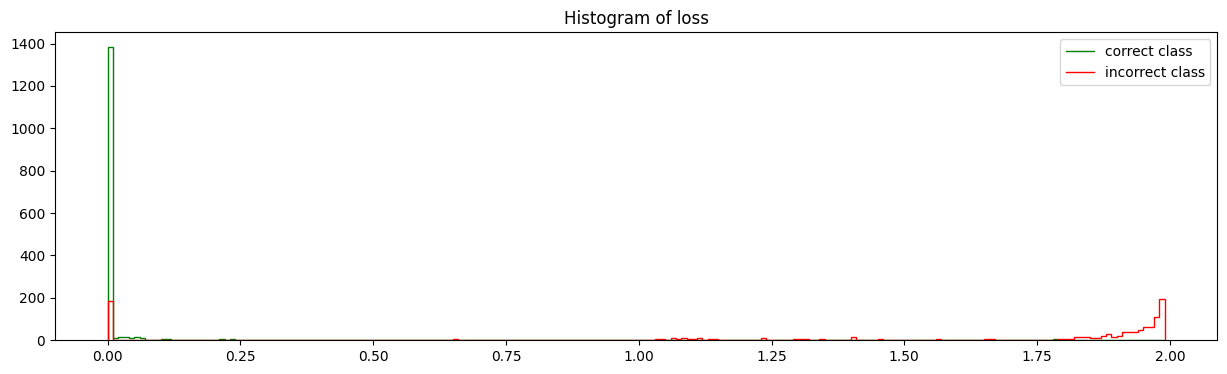

In [43]:
# print(data)
# hist, bin_edges = np.histogram(data['POS'], density=True)
plt.figure(figsize=(15, 4))
counts, bins = np.histogram(data['POS'],bins=np.arange(0,2,0.01))
plt.stairs(counts, bins,color='green',label='correct class')
counts, bins = np.histogram(data['NEG'],bins=np.arange(0,2,0.01))
plt.stairs(counts, bins,color='red',label='incorrect class')
plt.title("Histogram of loss")
plt.legend()
# plt.xlim(0,0.25)
plt.show()



In [47]:
def calc_acc(data,th):
    p = data['POS']<th
    n = data['NEG']>th
    pp=np.sum(p)/len(p)
    nn=np.sum(n)/len(n)
    pn=(np.sum(n)+np.sum(p))/(len(n)+len(p))
    return pn
print(max(data['POS']))

1.7883146


0.931640625 0.839


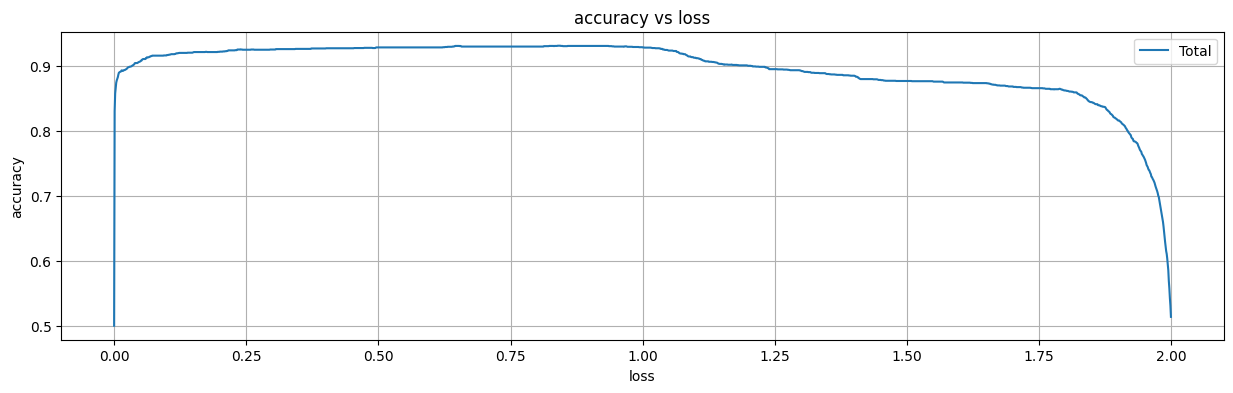

In [48]:
th_range = np.arange(0,2,0.001)
res = []

for th in th_range:
    res.append(calc_acc(data,th))

res = np.array(res)
print(np.max(res),th_range[np.argmax(res)])


plt.figure(figsize=(15, 4))
plt.plot(th_range,res,label='Total')
# plt.plot(th_range,res[:,0],label='Positive')
# plt.plot(th_range,res[:,1],label='Negative')
# plt.plot(h['val_'+k],label='val')
plt.title('accuracy vs loss')
plt.xlabel('loss')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Results on the influence of the number of considered fearures 
Read all the accuracies and make some datapoints. 
compression factor= 512*2/nr_featrues


In [64]:
class Result:
    def __init__(self,outputsize=2, avg=True) -> None:
        self.count=8
        self.output_size = outputsize
        self.fn=f'../Results/FSK/FSK_{outputsize}'+'/Res_{}/Results/info'
        self.accuracy = self.get_avg_acc() if avg else self.get_max_acc()
    
    def get_avg_acc(self):
        res = 0
        c = 0
        for i in range(self.count):
            with open(self.fn.format(i), "r") as outfile:
                info =  json.load(outfile)
                res+=info['acc']
                c+=1
        return res/c
    def get_max_acc(self):
        res = 0
        for i in range(self.count):
            with open(self.fn.format(i), "r") as outfile:
                info =  json.load(outfile)
                if info['acc']>res:
                    res = info['acc']
                
        return res


r = Result(2)

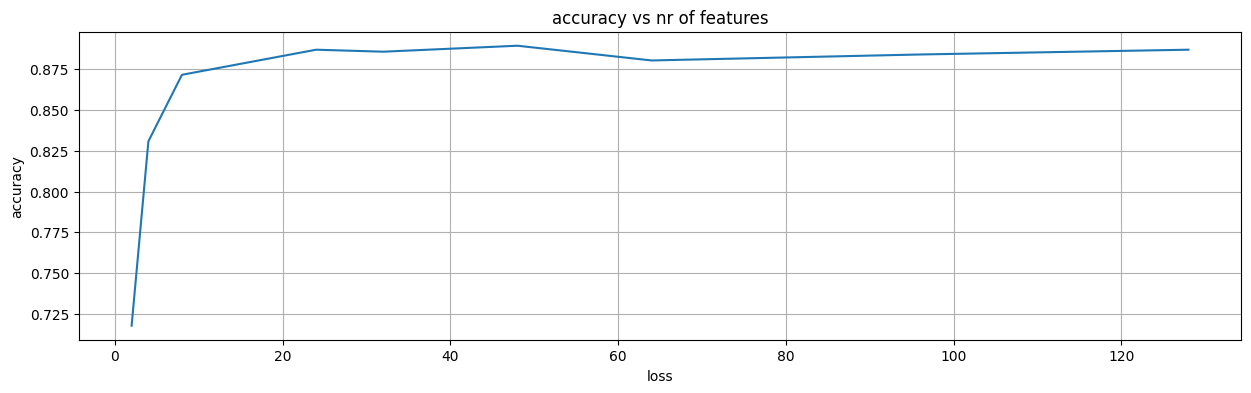

In [65]:
sizes = [2,4,8,24,32,48,64,96,128]

resc = [Result(s) for s in sizes]

res = [r.accuracy for r in resc]

plt.figure(figsize=(15, 4))
plt.plot(sizes,res)

plt.title('accuracy vs nr of features')
plt.xlabel('loss')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

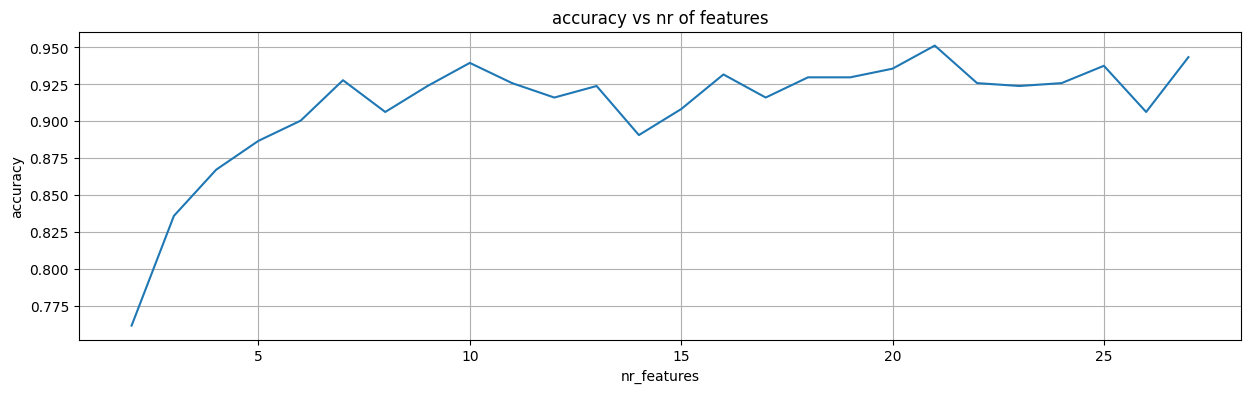

In [66]:
sizes = range(2,28)

resc = [Result(s,avg=False) for s in sizes]

res = [r.accuracy for r in resc]

plt.figure(figsize=(15, 4))
plt.plot(sizes,res)

plt.title('accuracy vs nr of features')
plt.xlabel('nr_features')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()